In [123]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [86]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # GPU를 비활성화

In [3]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)
output_dir = "myLearningData/savefig/3line/LargeData"  # 저장할 폴더 이름

if not os.path.exists(output_dir): # 폴더가 없는 경우 폴더를 생성합니다.
    os.makedirs(output_dir)
data = '231211_1258_4kPa_6.5V_3line_100ms_Data'
dataname = data+'OpNode64'
filename = 'myData/'+data+'.csv'
SDreal = pd.read_csv(filename)
SDreal=SDreal.iloc[:,:40]
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx46,Sx47,Sx50,Sx51,Sx52,Sx53,Force,z,theta,r
count,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,...,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000,122401.000000
mean,67.572897,65.126572,58.586069,62.957115,54.000174,63.236946,61.290195,70.188198,70.153622,60.146137,...,59.094186,55.797349,57.841626,55.690579,59.958909,64.557372,99.716389,80.015817,177.532904,8.000637
std,1.527028,1.467372,1.265908,1.807361,1.880088,2.538641,1.866859,2.064373,1.387104,1.649003,...,1.769161,1.597122,1.621129,2.217930,1.520740,1.564815,69.328081,43.822956,103.924681,2.582337
min,49.510000,45.820000,44.570000,47.700000,38.380000,40.280000,42.530000,46.890000,53.780000,43.260000,...,40.420000,37.240000,39.590000,37.480000,41.360000,46.200000,-0.300000,8.000000,0.000000,4.000000
25%,67.140000,64.680000,57.880000,62.300000,52.820000,62.750000,60.570000,70.060000,69.670000,59.700000,...,58.440000,55.380000,57.270000,54.840000,59.270000,64.060000,39.080000,40.000000,90.000000,6.000000
50%,67.780000,65.380000,58.660000,63.340000,54.060000,63.790000,61.570000,70.610000,70.250000,60.350000,...,59.470000,56.080000,58.040000,56.040000,60.250000,64.760000,97.220000,80.000000,180.000000,8.000000
75%,68.410000,65.970000,59.420000,64.090000,55.420000,64.600000,62.410000,71.090000,70.850000,60.940000,...,60.200000,56.660000,58.740000,57.070000,60.910000,65.420000,154.640000,120.000000,270.000000,10.000000
max,71.570000,69.250000,62.910000,67.090000,58.900000,67.860000,67.090000,73.820000,74.150000,65.300000,...,63.360000,60.700000,64.110000,61.290000,64.360000,68.560000,265.780000,152.000000,355.000000,12.000000


In [4]:
# SDreal에서 결측값 제거
SDreal = SDreal[~SDreal.isna().any(axis=1)]

#SDreal = SDreal[~((SDreal <= -400) & (SDreal.columns == "Force")).any(axis=1)]
#SDreal = SDreal[~((SDreal >= 400) & (SDreal.columns == "Force")).any(axis=1)]
#SDreal['Force'] = SDreal['Force'].apply(lambda x: 0 if x < 0 else x)

SDreal = SDreal[~((SDreal <= 100) & (SDreal.columns == "Force")).any(axis=1)]
SDreal = SDreal[SDreal["r"] >= 4]
SDreal = SDreal[SDreal["r"] <= 12]

#SDreal = SDreal[SDreal["z"] <= 151]
#SDreal = SDreal[SDreal["z"] >= 9]

import numpy as np
toRad = np.pi/180.0
SDreal['cos']=np.cos(SDreal['theta']*toRad)
SDreal['sin']=np.sin(SDreal['theta']*toRad)
SDreal.describe()


,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx50,Sx51,Sx52,Sx53,Force,z,theta,r,cos,sin
count,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,...,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,6.005800e+04,60058.000000
mean,67.482423,65.147412,58.582058,63.021155,54.121981,63.200223,61.443936,69.968015,70.039182,59.972912,...,57.833775,55.977978,59.975593,64.483420,160.623521,81.977955,178.441923,10.205651,-7.973908e-03,0.001008
std,1.774503,1.683402,1.371551,2.083550,2.144905,2.971724,2.122131,2.392661,1.586813,1.943580,...,1.801330,2.498854,1.703573,1.757777,39.097984,40.522497,103.334862,1.345708,7.052019e-01,0.708973
min,49.510000,45.820000,44.570000,47.700000,38.380000,40.280000,42.530000,46.890000,53.780000,43.260000,...,39.590000,37.480000,41.360000,46.260000,100.010000,8.000000,0.000000,8.000000,-1.000000e+00,-1.000000
25%,67.150000,64.810000,57.890000,62.540000,52.890000,62.980000,60.870000,69.942500,69.630000,59.560000,...,57.370000,55.180000,59.400000,64.100000,129.242500,48.000000,90.000000,9.000000,-7.071068e-01,-0.707107
50%,67.780000,65.500000,58.670000,63.570000,54.300000,63.970000,61.830000,70.530000,70.200000,60.250000,...,58.130000,56.480000,60.320000,64.780000,155.860000,80.000000,180.000000,10.000000,-1.836970e-16,0.000000
75%,68.420000,66.070000,59.450000,64.270000,55.780000,64.720000,62.660000,71.000000,70.790000,60.860000,...,58.770000,57.500000,60.960000,65.390000,191.160000,112.000000,270.000000,11.000000,7.071068e-01,0.707107
max,71.570000,68.590000,62.910000,67.090000,58.900000,67.860000,67.090000,73.020000,74.000000,65.300000,...,64.110000,61.290000,63.620000,68.190000,265.780000,152.000000,355.000000,12.000000,1.000000e+00,1.000000


In [5]:
NUMSEN = 36
# 24개의 특성에 대한 평균과 표준편차를 계산합니다.
mean_values = SDreal.iloc[:, :NUMSEN].mean().values
std_values = SDreal.iloc[:, :NUMSEN].std().values

mean_values = [round(value, 2) for value in mean_values]
std_values = [round(value, 2) for value in std_values]

print("float Xmean[36] = {", ", ".join(map(str, mean_values)), "};")
print("float Xstd[36] = {", ", ".join(map(str, std_values)), "};")


min_max_F = [round(SDreal.iloc[:, NUMSEN].min(), 2), round(SDreal.iloc[:, NUMSEN].max(), 2)]
min_max_Z = [round(SDreal.iloc[:, NUMSEN+1].min(), 2), round(SDreal.iloc[:, NUMSEN+1].max(), 2)]

print("float Fminmax[2]={", ", ".join(map(str, min_max_F)), "};")
print("float Zminmax[2]={", ", ".join(map(str, min_max_Z)), "};")

float Xmean[36] = { 67.48, 65.15, 58.58, 63.02, 54.12, 63.2, 61.44, 69.97, 70.04, 59.97, 62.7, 63.44, 63.64, 54.17, 60.33, 58.8, 56.29, 50.49, 56.42, 63.25, 55.94, 50.0, 55.87, 55.06, 65.24, 65.14, 68.35, 61.96, 63.75, 55.76, 59.12, 55.78, 57.83, 55.98, 59.98, 64.48 };
float Xstd[36] = { 1.77, 1.68, 1.37, 2.08, 2.14, 2.97, 2.12, 2.39, 1.59, 1.94, 1.7, 2.29, 1.34, 1.3, 1.83, 1.52, 1.39, 1.4, 1.61, 1.89, 2.13, 2.85, 2.36, 1.67, 1.9, 2.07, 1.96, 1.6, 1.79, 1.93, 1.95, 1.82, 1.8, 2.5, 1.7, 1.76 };
float Fminmax[2]={ 100.01, 265.78 };
float Zminmax[2]={ 8, 152 };


In [6]:
def apply_transformation(df, columns, transformation):
    # columns가 제공되지 않았다면 df의 모든 칼럼을 대상으로 함
    if columns is None:
        columns = df.columns
    for column in columns:
        df[column] = transformation(df[column])
    return df

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())
def standardize(column):
    return (column - column.mean()) / column.std()
def submean(column):
    return (column - column.mean())
def normalize_to_neg1_to_1(column):
    normalized = (column - column.min()) / (column.max() - column.min())  # Min-Max normalization (0 to 1)
    return (normalized - 0.5) * 2  # Transform to -1 to 1


SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], normalize_to_neg1_to_1)
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx50,Sx51,Sx52,Sx53,Force,z,theta,r,cos,sin
count,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,...,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,60058.000000,6.005800e+04,60058.000000
mean,67.482423,65.147412,58.582058,63.021155,54.121981,63.200223,61.443936,69.968015,70.039182,59.972912,...,57.833775,55.977978,59.975593,64.483420,-0.268703,0.027472,178.441923,0.102826,-7.973908e-03,0.001008
std,1.774503,1.683402,1.371551,2.083550,2.144905,2.971724,2.122131,2.392661,1.586813,1.943580,...,1.801330,2.498854,1.703573,1.757777,0.471714,0.562812,103.334862,0.672854,7.052019e-01,0.708973
min,49.510000,45.820000,44.570000,47.700000,38.380000,40.280000,42.530000,46.890000,53.780000,43.260000,...,39.590000,37.480000,41.360000,46.260000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000e+00,-1.000000
25%,67.150000,64.810000,57.890000,62.540000,52.890000,62.980000,60.870000,69.942500,69.630000,59.560000,...,57.370000,55.180000,59.400000,64.100000,-0.647313,-0.444444,90.000000,-0.500000,-7.071068e-01,-0.707107
50%,67.780000,65.500000,58.670000,63.570000,54.300000,63.970000,61.830000,70.530000,70.200000,60.250000,...,58.130000,56.480000,60.320000,64.780000,-0.326175,0.000000,180.000000,0.000000,-1.836970e-16,0.000000
75%,68.420000,66.070000,59.450000,64.270000,55.780000,64.720000,62.660000,71.000000,70.790000,60.860000,...,58.770000,57.500000,60.960000,65.390000,0.099716,0.444444,270.000000,0.500000,7.071068e-01,0.707107
max,71.570000,68.590000,62.910000,67.090000,58.900000,67.860000,67.090000,73.020000,74.000000,65.300000,...,64.110000,61.290000,63.620000,68.190000,1.000000,1.000000,355.000000,1.000000,1.000000e+00,1.000000


In [7]:
SDy = SDreal.iloc[:,36:42]
X = SDreal.iloc[:,0:36]
y = SDreal.iloc[:,[36,37,40,41]]
y

,Force,z,cos,sin
81,-0.816372,-1.0,1.000000,0.000000
82,-0.763648,-1.0,1.000000,0.000000
83,-0.780419,-1.0,1.000000,0.000000
84,-0.793931,-1.0,1.000000,0.000000
85,-0.804548,-1.0,1.000000,0.000000
...,...,...,...,...
122396,-0.098510,1.0,0.996195,-0.087156
122397,-0.110454,1.0,0.996195,-0.087156
122398,-0.120347,1.0,0.996195,-0.087156
122399,-0.129155,1.0,0.996195,-0.087156


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state=42)
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)
y_train = y_train.values
print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  36034 ea 59 %    X_valid:  12012 ea 20 %    X_test:  12012 ea 20 %


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SㅣS.pkl'
dump(scaler, file_name)

['myScaler/231211_1258_4kPa_6.5V_3line_100ms_DataOpNode64_SㅣS.pkl']

In [11]:
from tensorflow import keras
model = keras.models.Sequential([  
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),    
    keras.layers.Dense(32, activation="relu", kernel_initializer = "he_normal"), 
    keras.layers.Dense(32, activation="relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(32, activation="relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(32 activation="relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(4)    
])
model.compile(loss="mean_squared_error", optimizer='adam')
model.summary()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1074388982.py, line 7)

## Callback (best, early stopping, tensorboard)

In [ ]:
import os 
#root_logdir = os.path.join(os.curdir, 'mylog/'+data)
root_logdir = os.path.join(os.curdir, 'mylog/'+'231006_Data')

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [ ]:
dataname

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,verbose=1,restore_best_weights = True)
n_epochs = 300
batch_size = 1
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

In [454]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v3/myModel/'+dataname+'.h5')

In [84]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)
valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_force","valid_z"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r"]
valid_predictions_df.columns = ["valid_force","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r","valid_cos","valid_sin"]
valid_theta_rad = np.arctan2(valid_predictions_df['valid_sin'], valid_predictions_df['valid_cos'])
valid_theta_deg = np.degrees(valid_theta_rad)
valid_predictions_df['valid_theta'] = valid_theta_deg
valid_predictions_df['valid_theta'] /= 180
valid_predictions_df['valid_square'] = valid_predictions_df['valid_cos']**2 + valid_predictions_df['valid_sin']**2
valid_predictions_df.describe()

677/677 [==============================] - 2s 2ms/step


,valid_force,valid_z,valid_cos,valid_sin,valid_theta,valid_square
count,21647.000000,21647.000000,21647.000000,21647.000000,21647.000000,21647.000000
mean,-0.155014,0.026110,0.034045,0.008062,-0.010585,0.971372
std,0.485580,0.592462,0.693582,0.699383,0.570096,0.154276
min,-1.136988,-1.343847,-1.212564,-1.042296,-0.999991,0.002440
25%,-0.609643,-0.471681,-0.641377,-0.679431,-0.482831,0.888880
50%,-0.208392,0.024579,0.027983,-0.043977,-0.027444,0.971093
75%,0.222330,0.529069,0.720354,0.700661,0.498107,1.053048
max,1.324261,1.388762,1.189835,1.263348,0.999977,1.835222


In [85]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["force","z","cos","sin"]
#k_df.columns  = ["z","cos","sin"]

#k_df.columns  = ["force","z","r","cos","sin"]
theta_rad = np.arctan2(k_df['sin'], k_df['cos'])
theta_deg = np.degrees(theta_rad)
k_df['theta'] = theta_deg
k_df['theta'] /= 180
k_df['square'] = k_df['cos']*k_df['cos'] + k_df['sin']*k_df['sin']
k_df

,force,z,cos,sin,theta,square
0,-0.024084,1.000000,0.984808,0.173648,0.055556,1.0
1,0.009709,1.000000,1.000000,0.000000,0.000000,1.0
2,0.302401,-0.444444,-0.939693,-0.342020,-0.888889,1.0
3,0.421841,-0.444444,-0.258819,0.965926,0.583333,1.0
4,0.905622,-0.333333,-0.707107,-0.707107,-0.750000,1.0
...,...,...,...,...,...,...
21642,0.677504,-0.111111,0.984808,-0.173648,-0.055556,1.0
21643,0.548280,0.777778,-0.258819,0.965926,0.583333,1.0
21644,-0.104614,-0.222222,-0.819152,-0.573576,-0.805556,1.0
21645,-0.545345,0.888889,-0.984808,-0.173648,-0.944444,1.0


In [86]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr_matrix = pd.DataFrame(index=k_df.columns, columns=valid_predictions_df.columns)
loss= model.evaluate(X_valid, y_valid)
print("검증 손실:", round(loss,4))
avg = valid_predictions_df['valid_square'].mean()
std = valid_predictions_df['valid_square'].std()
n = 1.5  # adjust the offset value as needed
print("avg:",round(avg,2),"std:",round(std,2),"      ",round(avg - n*std,2),round(avg + n*std,2))
# 각 열과 행의 상관관계 계산
for k_col in k_df.columns:
    for valid_col in valid_predictions_df.columns:
        corr2 = np.corrcoef(k_df[k_col], valid_predictions_df[valid_col])[0, 1]
        corr_matrix.loc[k_col, valid_col] = corr2
corr_matrix

corr
93.60% force
98.12% z
98.51% cos
98.49% sin
87.88% theta
1.19% square
677/677 [==============================] - 2s 3ms/step - loss: 0.0186
검증 손실: 0.0186
avg: 0.97 std: 0.15        0.74 1.2


,valid_force,valid_z,valid_cos,valid_sin,valid_theta,valid_square
force,0.936004,0.042753,-0.018333,0.036754,0.027223,0.233768
z,0.071141,0.981166,-0.006589,0.02644,0.012934,0.064038
cos,-0.093603,0.036867,0.985129,0.003938,0.037731,0.289683
sin,-0.042583,0.025476,-0.055093,0.98493,0.765297,0.355584
theta,-0.014511,0.016785,-0.07554,0.765703,0.878786,0.248944
square,0.00236,-0.001827,-0.048959,-0.003316,-0.053315,0.013908


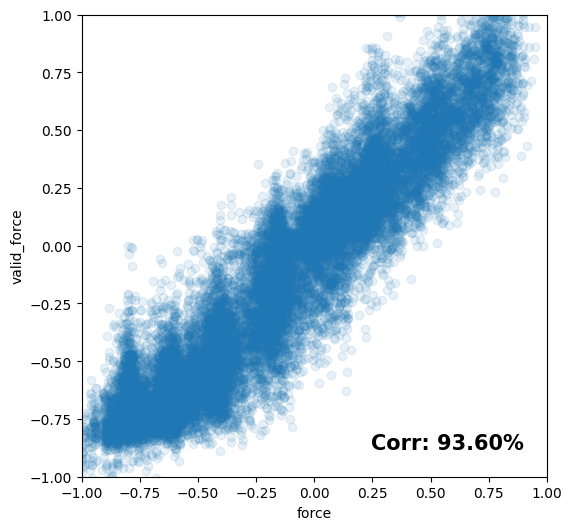

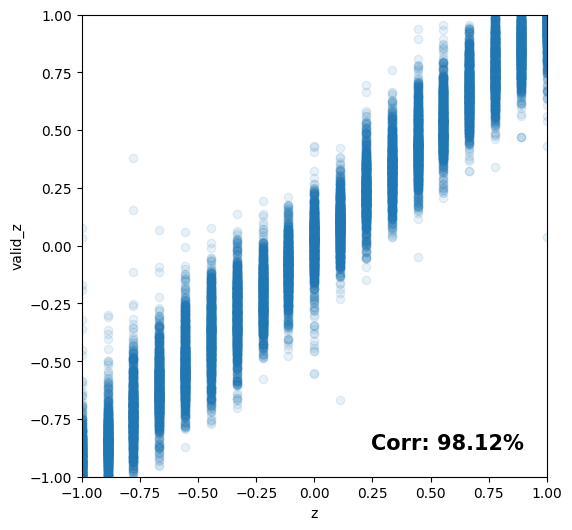

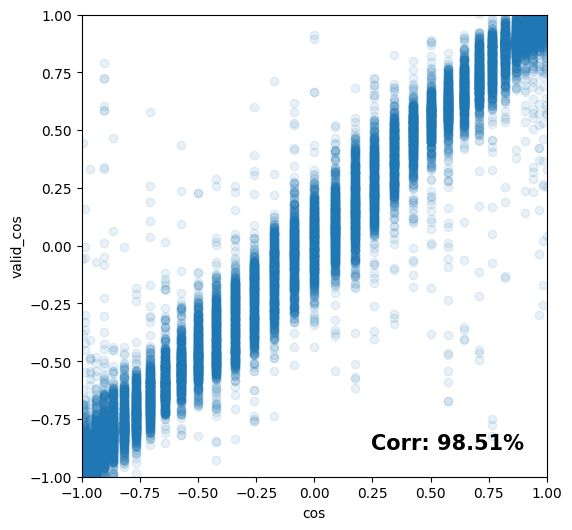

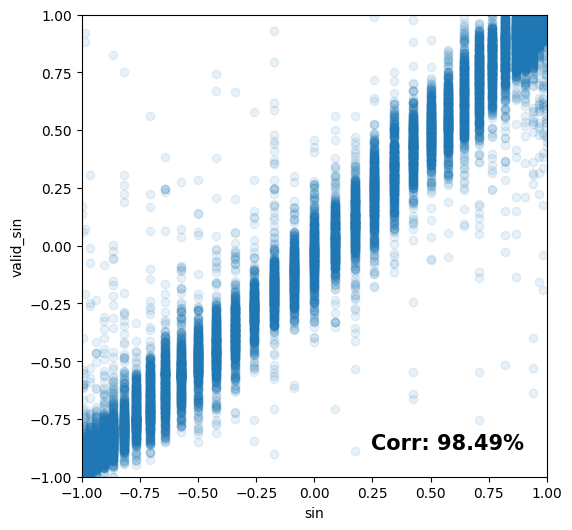

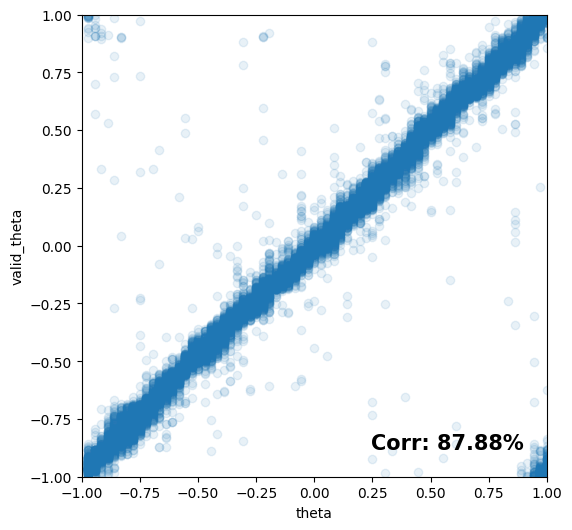

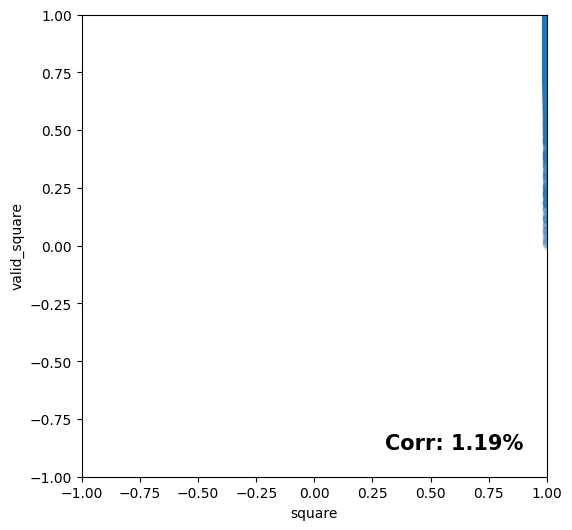

In [87]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1
output_dir = "myLearningData/savefig/3line/LargeData"  # 저장할 폴더 이름

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

fields = ['force','z','cos','sin','theta','square']
#fields = ['force','z','r','cos','sin','theta']
#fields = ['z','cos','sin','theta','square']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=alpa)
    plt.xlabel(field)
    plt.ylabel(f"valid_{field}")
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"valid_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


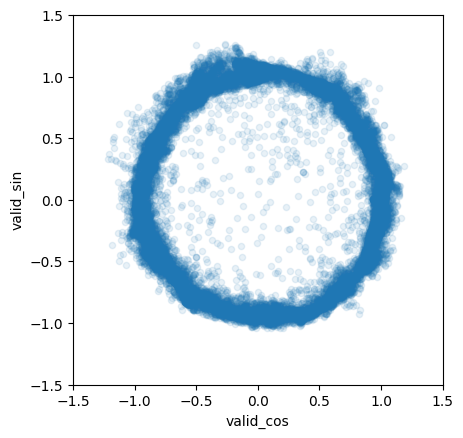

In [88]:
alpa = 0.1  # assuming you've set alpha to this value, adjust as needed
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpa)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

# Display the plot
plt.show()

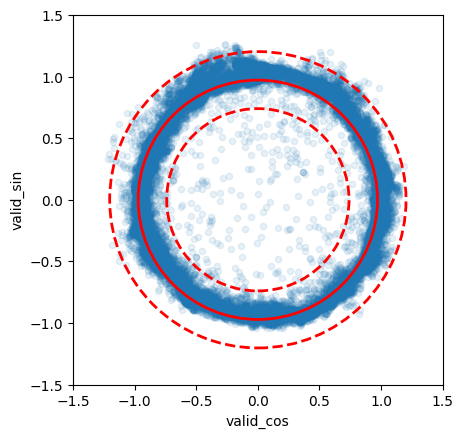

In [89]:
alpha = 0.1  # set alpha value for scatter plot
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)


# Draw offset circles (one inside and one outside the main circle)

circle = plt.Circle((0, 0), avg, color='r', fill=False, linewidth=2)
ax.add_artist(circle)
inner_circle = plt.Circle((0, 0), avg - n*std, color='r', linestyle='--', fill=False, linewidth=2)
outer_circle = plt.Circle((0, 0), avg + n*std, color='r', linestyle='--', fill=False, linewidth=2)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
# Display the plot
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_offset.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()


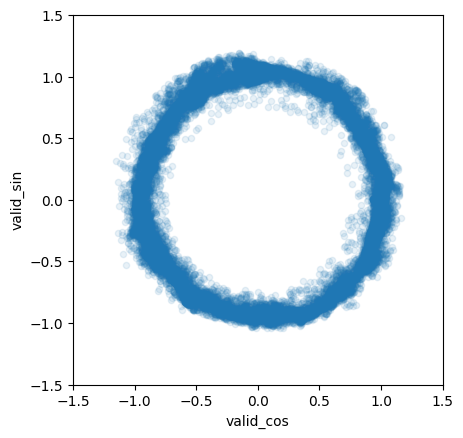

1.6953850418071787

In [90]:
ValidPre_filtered = ValidPre[
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 <= (avg + n*std)**2) &
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 >= (avg - n*std)**2)
]


ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()

total_data_count = len(ValidPre)
filtered_data_count = len(ValidPre_filtered)
percentage_filtered_out = ((total_data_count - filtered_data_count) / total_data_count) * 100
percentage_filtered_out

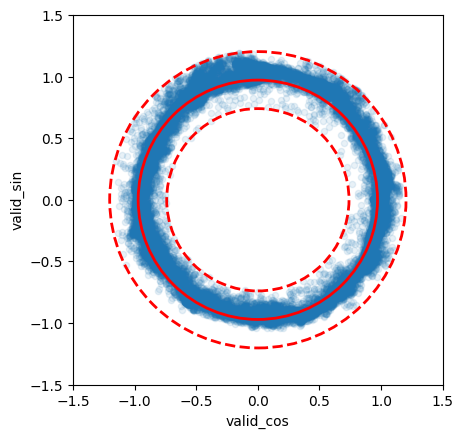

In [91]:
# 기존의 scatter plot을 그립니다.
ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)



# 점선 원을 추가합니다. 하나는 내부에, 하나는 외부에 위치합니다.
circle = plt.Circle((0, 0), avg, color='r', fill=False, linewidth=2)
inner_circle = plt.Circle((0, 0), avg - n*std, color='r', linestyle='--', fill=False, linewidth=2)
outer_circle = plt.Circle((0, 0), avg + n*std, color='r', linestyle='--', fill=False, linewidth=2)
ax.add_artist(circle)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# 그래프의 비율을 1:1로 설정합니다.
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정

# 그래프를 파일로 저장합니다.
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut_offset.png"))

# 그래프를 출력합니다.
plt.show()


진행 상태: 100.00%

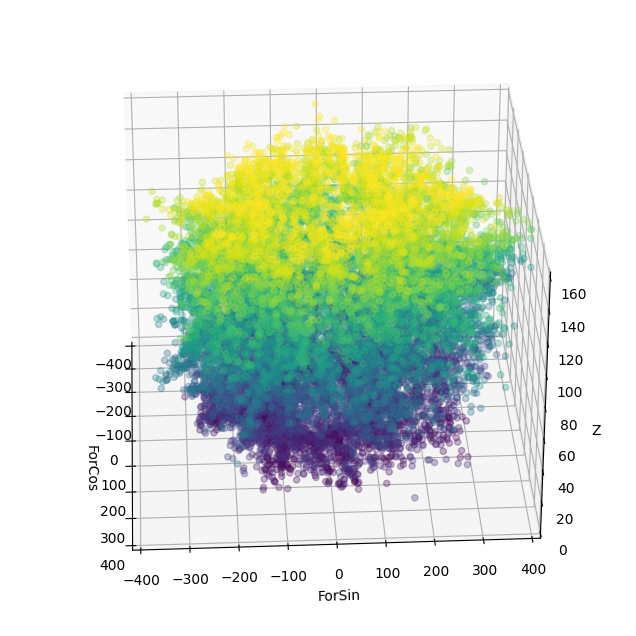

In [93]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


# 회전 애니메이션 함수 정의
def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()

# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# 'Inferno' 색상 맵 적용
cmap = plt.cm.viridis

# z 값을 0과 1 사이로 정규화
norm_z = (ValidPre['z'] - ValidPre['z'].min()) / (ValidPre['z'].max() - ValidPre['z'].min())

# 색상 맵 적용
colors = cmap(norm_z)


# 최소값과 최대값
min_value = 0.04
max_value = 265.78

# 원래 값으로 변환
Force = ((ValidPre['valid_force']/2+0.5) * (max_value - min_value)) + min_value +110
cos = Force*ValidPre['valid_cos']
sin =  Force*ValidPre['valid_sin']
z = ((ValidPre['valid_z']/2+0.5) * (152 - 8)) + 8 


ax.scatter(cos, sin, z, c=colors, alpha=0.3)

# 축 레이블 및 한계 설정
ax.set_xlabel('ForCos')
ax.set_ylabel('ForSin')
ax.set_zlabel('Z')
ax.set_xlim([-400, 400])
ax.set_ylim([-400, 400])
ax.set_zlim([0, 160])


 

# 애니메이션 생성 및 저장
nSteps = 3
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)

ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=nSteps*20)
ani.save(os.path.join(output_dir, f"{dataname}_3d_scatter_valid_force_color.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))

# 결과 확인
plt.show()


진행 상태: 100.00%

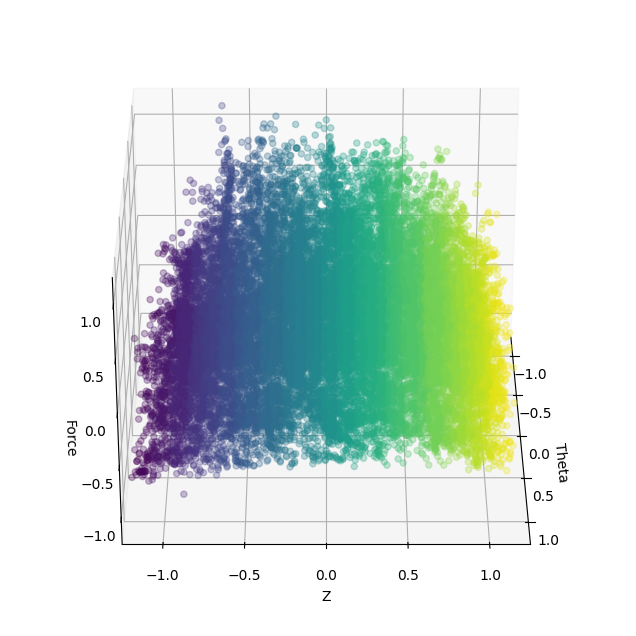

In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()
    
    
# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

z_bins = np.arange(-1.2, 1.2, 0.05)

z_indices = np.digitize(ValidPre['valid_z'], z_bins)

# 색상 맵 설정
colors = plt.cm.viridis(np.linspace(0, 1, len(z_bins)))

# 3D 스캐터 플롯 생성
# 각 점에 색상 배열을 적용하기 위해 z_indices-1을 사용
for i in range(1, len(z_bins)):
    subset = ValidPre[z_indices == i]
    ax.scatter(subset['valid_theta'], subset['valid_z'], subset['valid_force'], color=colors[i-1], alpha=0.3)

# 축 레이블 설정
ax.set_xlabel('Theta')
ax.set_ylabel('Z')
ax.set_zlabel('Force')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])

nSteps = 3
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)
# GIF 애니메이션 생성
ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=100)

# GIF 저장
ani.save(os.path.join(output_dir, f"{dataname}_Ref_plane.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))


In [95]:
import pandas as pd
from sklearn.cross_decomposition import CCA

# 가정: 'ValidPre' 데이터프레임은 이미 로드되어 있고, 필요한 모든 원시 데이터를 포함하고 있음

# Force, cos, sin, z 값 계산 - 첫 번째 데이터 세트
Force1 = ((ValidPre['valid_force']/2 + 0.5) * (max_value - min_value)) + min_value + 110
cos1 = Force1 * ValidPre['valid_cos']
sin1 = Force1 * ValidPre['valid_sin']
z1 = ((ValidPre['valid_z']/2 + 0.5) * (152 - 8)) + 8

# Force, cos, sin, z 값 계산 - 두 번째 데이터 세트
Force2 = ((ValidPre['force']/2 + 0.5) * (max_value - min_value)) + min_value + 110
cos2 = Force2 * ValidPre['cos']
sin2 = Force2 * ValidPre['sin']
z2 = ((ValidPre['z']/2 + 0.5) * (152 - 8)) + 8

# 데이터프레임 생성
df1 = pd.DataFrame({'ForceCos': Force1*cos1, 'ForceSin': Force1*sin1, 'Z': z1})
df2 = pd.DataFrame({'ForceCos': Force2*cos2, 'ForceSin': Force2*sin2, 'Z': z2})

# 캐노니컬 상관 분석 (CCA) 수행
# CCA 인스턴스 생성, 여기서 n_components는 분석할 컴포넌트 수, 두 데이터 세트의 변수 수에 맞게 설정
cca = CCA(n_components=min(df1.shape[1], df2.shape[1]))

# CCA 적합
cca.fit(df1, df2)

# 결과 변환
df1_c, df2_c = cca.transform(df1, df2)

# CCA 결과 출력
print("Canonical Correlation per component:")
for i, (cc1, cc2) in enumerate(zip(df1_c.T, df2_c.T), start=1):
    corr = np.corrcoef(cc1, cc2)[0, 1]
    print(f"Component {i}: {corr:.3f}")


C:\Users\JH_LAB\anaconda3\envs\TACTS\lib\site-packages\sklearn\cross_decomposition\_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Canonical Correlation per component:
Component 1: 0.982
Component 2: 0.980
Component 3: 0.977


In [96]:
import pandas as pd
from sklearn.cross_decomposition import CCA

# 가정: 'ValidPre' 데이터프레임은 이미 로드되어 있고, 필요한 모든 원시 데이터를 포함하고 있음

# Force, cos, sin, z 값 계산 - 첫 번째 데이터 세트
Force1 = ((ValidPre['valid_force']/2 + 0.5) * (max_value - min_value)) + min_value + 110
cos1 = Force1 * ValidPre['valid_cos']
sin1 = Force1 * ValidPre['valid_sin']
z1 = ((ValidPre['valid_z']/2 + 0.5) * (152 - 8)) + 8

# Force, cos, sin, z 값 계산 - 두 번째 데이터 세트
Force2 = ((ValidPre['force']/2 + 0.5) * (max_value - min_value)) + min_value + 110
cos2 = Force2 * ValidPre['cos']
sin2 = Force2 * ValidPre['sin']
z2 = ((ValidPre['z']/2 + 0.5) * (152 - 8)) + 8

# 데이터프레임 생성
df1 = pd.DataFrame({'ForceCos': Force1*cos1, 'ForceSin': Force1*sin1, 'Z': z1})
df2 = pd.DataFrame({'ForceCos': Force2*cos2, 'ForceSin': Force2*sin2, 'Z': z2})

# 캐노니컬 상관 분석 (CCA) 수행
# CCA 인스턴스 생성, 여기서 n_components는 분석할 컴포넌트 수, 두 데이터 세트의 변수 수에 맞게 설정
cca = CCA(n_components=min(df1.shape[1], df2.shape[1]))

# CCA 적합
cca.fit(df1, df2)

# 결과 변환
df1_c, df2_c = cca.transform(df1, df2)

# CCA 결과 출력
print("Canonical Correlation per component:")
for i, (cc1, cc2) in enumerate(zip(df1_c.T, df2_c.T), start=1):
    corr = np.corrcoef(cc1, cc2)[0, 1]
    print(f"Component {i}: {corr:.3f}")


Canonical Correlation per component:
Component 1: 0.982
Component 2: 0.980
Component 3: 0.977


C:\Users\JH_LAB\anaconda3\envs\TACTS\lib\site-packages\sklearn\cross_decomposition\_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


진행 상태: 100.00%

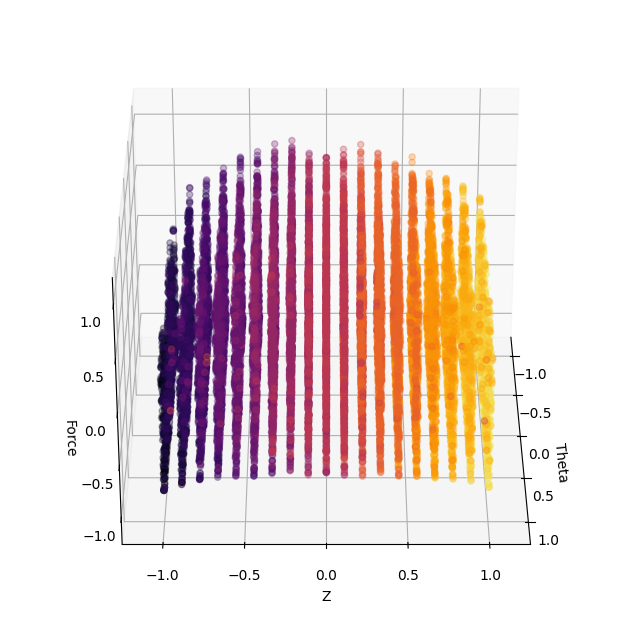

In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


# 회전 애니메이션 함수 정의
def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()
    
# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

z_bins = np.arange(-1.2, 1.2, 0.05)

z_indices = np.digitize(ValidPre['valid_z'], z_bins)

# 색상 맵 설정
colors = plt.cm.inferno(np.linspace(0, 1, len(z_bins)))

# 3D 스캐터 플롯 생성
# 각 점에 색상 배열을 적용하기 위해 z_indices-1을 사용
for i in range(1, len(z_bins)):
    subset = ValidPre[z_indices == i]
    ax.scatter(subset['theta'], subset['z'], subset['force'], color=colors[i-1], alpha=0.3)

# 축 레이블 설정
ax.set_xlabel('Theta')
ax.set_ylabel('Z')
ax.set_zlabel('Force')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])

nSteps = 3
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)
# GIF 애니메이션 생성
ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=100)

# GIF 저장
ani.save(os.path.join(output_dir, f"{dataname}_Ref.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))
